# Generate Simulated Data: Random-Plaintext-Unprotected

In [26]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [27]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -4
    jitterRight = 4
else:
    jitterLeft = None
    jitterRight = None

In [28]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [29]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,None,None


In [30]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [31]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))

print("plaintext:",plaintext[0:5])

plaintext: [68, 41, 217, 247, 129]


In [32]:
# Verify size of plaintext
len(plaintext)

100000

In [33]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [2.9869741989377214, -5.638253393961486, 2.9855784566410852, 4.215079022121312, -4.087959400275819] 
labels: [6, 4, 4, 4, 2]


In [34]:
# Verify size of leakedData 
len(leakedData)

100000

In [35]:
# Verify size of labels 
len(labels)

100000

In [36]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace at index 24 equal to t=25, index i matches with the leaked data
        if z == 24:
            rawData.append(leakedData[i])
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart,noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [4.175383172926629, 2.3430310552496594, -0.4528405662718953, -8.444513560611039, 7.8084448852216095, 3.468365063918747, 13.062619752444283, 1.1048545524552926, 13.38168635109851, 6.852845177462058, 0.9159154864985763, -0.31948682116265914, 4.2527444693329866, 9.971618388517568, 11.183093070501647, 13.61408052816333, -2.3911658991105806, 9.980427296253788, 6.68992759596445, 5.269643181964675, 9.818547741053063, 2.8360805175046946, 4.099250606544749, 3.9451558496856256, 2.9869741989377214, 10.633188947807659, 1.2560033177798613, 4.596108130972706, 0.07145542267685467, -1.5603954640944409, -4.348665262167906, 10.118487074329305, 2.717216228330734, 8.092440112328678, -1.8514097051184963, -2.2467272185950318, 6.440350499105221, -5.74007570080649, 5.91389690475209, -0.8467047721625676, 3.3786181372646933, 6.766297940931629, 0.22845230915666637, 4.195575113621521, -4.391417590972648, 7.298948791552208, -0.8097340578990284, 2.316572242093501, 5.81698095425091, 5.167921

In [37]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

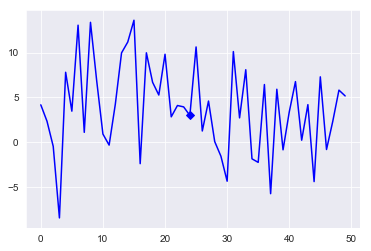

In [38]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[24])

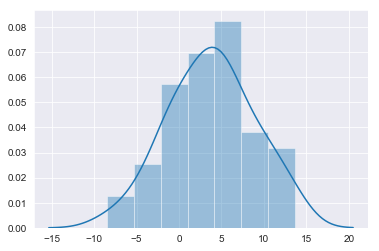

In [39]:
sns.distplot(rawTraces[0])

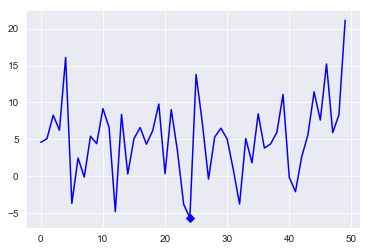

In [40]:
plt.plot(rawTraces[1],'-bD',markevery=[24])

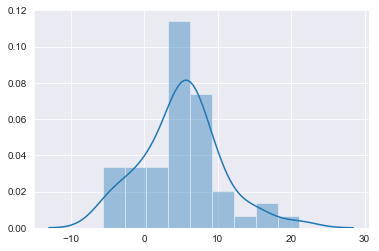

In [41]:
sns.distplot(rawTraces[1])

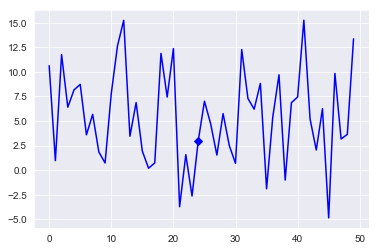

In [42]:
plt.plot(rawTraces[2],'-bD',markevery=[24])

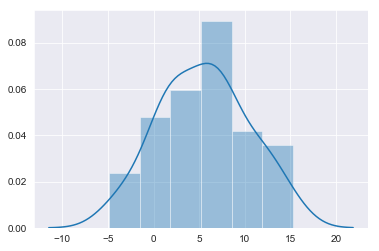

In [43]:
sns.distplot(rawTraces[2])

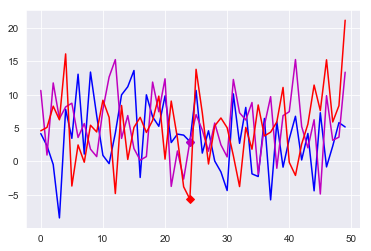

In [44]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [45]:
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [46]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
        
unittest.main(argv=[''], verbosity=1, exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


In [47]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,4.175383,2.343031,-0.452841,-8.444514,7.808445,3.468365,13.062620,1.104855,13.381686,6.852845,...,6.766298,0.228452,4.195575,-4.391418,7.298949,-0.809734,2.316572,5.816981,5.167921,68
1,4.592465,5.100148,8.284061,6.240042,16.099992,-3.670347,2.474137,-0.111263,5.424709,4.421830,...,-2.087692,2.622845,5.593588,11.434803,7.614591,15.219306,5.912329,8.351657,21.138154,41
2,10.630064,0.968748,11.755013,6.405558,8.166857,8.723724,3.594201,5.675704,1.846271,0.731582,...,15.256936,5.217157,2.047155,6.252214,-4.863424,9.848891,3.172100,3.641126,13.361897,217
3,-0.799139,-2.137798,3.560631,-2.047897,1.994666,1.133884,1.152621,-0.893983,1.127427,-0.977803,...,-4.718450,11.741427,7.399457,4.971619,1.131153,10.265236,2.130027,0.005758,9.320901,247
4,8.286332,0.672438,19.567030,-5.980767,12.899296,10.030267,3.561895,-2.487973,5.964536,6.437123,...,8.533031,7.632996,5.627713,1.277311,1.375316,4.659124,8.548370,5.638033,9.417797,129


### Write Data 

In [48]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/RPFK.csv',index=False)